In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import jieba
import re
from gensim.models import word2vec

In [2]:
train_data = pd.read_csv('train.csv', sep='\t')

In [3]:
train_data.head()

,label,comment
0,0,一如既往地好吃，希望可以开到其他城市
1,0,味道很不错，分量足，客人很多，满意
2,0,下雨天来的，没有想象中那么火爆。环境非常干净，古色古香的，我自己也是个做服务行业的，我都觉得...
3,0,真心不好吃 基本上没得好多味道
4,0,少送一个牛肉汉堡 而且也不好吃 特别是鸡肉卷 **都不想评论了 谁买谁知道


In [4]:
# 建立停用词表
stopwords = [line.strip() for line in open('hit_stop_word.txt', 'r', encoding='utf-8').readlines()]
others = ['﹏', '\\', '◦', '˙', 'っ', '˘', 'ڡ', '˘', 'ς', '´', 'ﾉ']

In [5]:
# 中文分词
jieba.load_userdict('my_dict.txt') 
comment_list = train_data['comment'].values
label_list = []
word_list = []
row = 0
for comment in comment_list:
    comment = re.sub('[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', " ", comment)
    temp = list(jieba.cut(comment))
    temp_list = []
    for word in temp:
        # 去除停用词
        if word not in stopwords:
            if word not in others:
                # 清除空格
                if word != ' ':
                    temp_list.append(word)
    print(train_data.loc[row, 'label'], temp_list)
    if len(temp_list) > 0:
        word_list.append(temp_list)
        label_list.append(train_data.loc[row, 'label'])
    row += 1

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/72/ltbl67xj3vn214n2_9ctjwxr0000gn/T/jieba.cache
Loading model cost 0.762 seconds.
Prefix dict has been built succesfully.


0 ['一如既往', '好吃', '希望', '可以', '开', '城市']
0 ['味道', '很', '不错', '分量', '足', '客人', '很多', '满意']
0 ['下雨天', '没有', '想象', '中', '火爆', '环境', '非常', '干净', '古色古香', '做', '服务行业', '都', '觉得', '服务', '非常好', '场地', '脏', '马上', '阿姨', '打扫']
0 ['真心', '不', '好吃', '基本上', '没', '好多', '味道']
0 ['少送', '牛肉', '汉堡', '不', '好吃', '特别', '鸡肉', '卷', '都', '不想', '评论', '买', '知道']
0 ['用美团', '图', '打折']
0 ['好难', '吃水', '煮', '鸡杂']
0 ['环境', '很', '好', '服务', '很', '热情', '味道', '非常好', '鱼', '很', '新鲜', '儿子', '吃', '好', '饱', '包子', '饺子', '很', '好吃']
0 ['一如既往', '好吃', '个人', '更', '喜欢', '吃', '全翅']
0 ['四个', '吃饱', '阔以']
0 ['蛋糕', '很', '好吃', '送货', '及时', '服务', '一流', '下次', '机会', '继续', '买']
0 ['肉', '不', '好吃', '脆香', '鸡排', '煲仔饭', '半', '卤蛋', '秘制', '小炒', '肉', '煲仔饭', '半', '卤蛋', '太辣', '功夫', '烤', '鸡腿肉', '煲仔饭', '半', '卤蛋', '越', '吃', '越', '没味']
1 ['恶心', '不想', '说', '喝', '嘴里', '嚼', '两下', '觉得', '口感', '不', '吐出来', '只', '小', '蟑螂', '关键', '还', '嚼', '两口', '昨天', '喝了', '恶心', '现在', '饮食', '行业', '麻烦', '注意', '卫生', '好']
0 ['巨', '难吃', '咸', '酸']
0 ['价格', '实惠', '服务态度', '很', '好', '分量', '超足

0 ['味道', '不错', '最', '重要', '太', '便宜', '值得', '值得']
0 ['好吃不', '贵', '价格', '实惠']
1 ['不', '好吃', '冷饭', '隔夜饭', '来了', '一次', '不会', '再有', '下次', '冬瓜', '里', '头发', '去', '太', '不', '用心', '饭', '硬', '馊']
0 ['很', '不错', '量', '很大', '一家', '三口', '没', '吃', '完', '呵呵']
0 ['朋友', '一起', '去', '挺不错', '店', '菜品', '还', '算', '丰富']
0 ['送', '小时', '抄手', '筷子', '都', '不', '手抓']
0 ['去', '蛮', '早', '坐', '双人', '位子', '一点', '挤', '还好', '比较', '方便', '很多', '人', '都', '团购', '去', '服务员', '态度', '超好', '都', '很', '热心', '服务', '东西', '很多', '很', '新鲜', '一去', '吃了', '白灼', '虾', '鲍鱼', '燕窝', '粥', '寿司', '很', '不错', '第一次', '同学', '起来', '之后', '机会', '会', '经常', '很', '干净', '大家', '都', '很', '秩序']
0 ['相当', '好', '分量', '足', '老板', '很', '热情']
1 ['两份', '肠粉', '一瓶', '辣酱', '就算', '吃', '一半', '发现', '大', '蚊子']
0 ['老板', '人', '超级', '热情', '店里', '装修', '漂亮', '大气', '店里', '水果', '燕窝', '试吃', '忍不住', '买', '些', '燕窝', '新店', '开业', '还', '九折', '划算', '不行', '地址', '爱琴海', '购物广场', '玫瑰', '天街', '源盏', '燕窝']
0 ['超级', '好', '服务', '很', '热情']
1 ['帮别人', '订', '吃', '头发', '只能', '差评']
0 ['不', '好吃', '打开', '一点'

0 ['很', '好看', '味道', '很', '不错']
0 ['味道', '非常', '不错', '份量', '足', '坐', '包房', '另收', '元', '国宾', '免费', '喝', '喝了', '三', '十几瓶', '赚']
0 ['不', '晓得', '囊个', '说', '粉丝', '扇贝', '卖', '壳', '味道不好', '都', '认', '扇贝', '里', '粉丝', '大概', '三根', '是不是', '太', '节约', '成本', '扇贝', '切', '两个', '卖', '超级', '差评']
0 ['分量', '少', '不', '说', '我点', '麻花', '没有', '麻花', '没有', '麻花', '没有', '麻花', '两块钱', '麻花', '迟', '十五分钟', '很早', '很', '早就', '喊', '去', '底楼', '之后', '好久', '才', '最烦', '饭', '没有', '外卖', '小哥', '忘', '没有', '饭', '冒菜', '感觉', '没有', '词语', '形容', '知道', '外卖', '小哥', '很', '幸苦', '一个多', '小时', '才', '等到', '冒菜', '还', '没有', '饭缺', '菜', '很惨']
0 ['挺好', '服务态度', '好']
0 ['不错', '一如既往', '好', '有点', '贵']
0 ['老', '顾客', '可以']
0 ['咖喱鸡', '真的', '不错', '我是', '打包', '一份', '辣白菜', '炒', '五花肉', '真心', '难吃']
1 ['肉', '都', '臭', '里面', '塑料袋', '醉', '送得', '很快', '态度', '不错', '味道', '确实', '不', '滴']
0 ['第一次', '去', '环境', '挺不错', '团购', '价格', '很', '实惠', '块钱', '限时', '抢购', '菜品', '很', '好', '份量', '很足', '没有', '吃', '完', '服务', '很', '好', '很', '不错', '下次', '还会', '光临']
0 ['好评', '味道', '不错', '服务态度'

0 ['先不说', '东西', '好不好', '吃', '必须', '说', '送餐', '大妈', '素质', '低', '使劲', '敲门', '整', '屋里', '狗', '狂叫', '还', '好意思', '狗拉好', '不要', '放', '出来', '咬', '真想', '说', '是不是', '毛病', '第一', '没', '礼貌', '使劲', '敲门', '没', '家教', '犯了错', '帮', '兜', '狗', '养', '没教过', '狗', '咬', '人', '技能', '一天', '没事', '放', '出来', '咬人', '不用', '赔钱', '去', '每家', '送货', '都', '可能', '遇到', '狗', '使劲', '敲门', '还', '撒腿就跑', '送货员', '大妈', '真想', '十次', '差评', '点餐', '饺子', '两', '量', '请问', '我点', '量', '收钱', '只怕', '金额', '差距', '太大']
0 ['服务态度', '好', '菜品', '新鲜', '价格', '实惠', '主要', '喝了', '两件', '纯', '生啤酒', '人均', '费用', '有点', '高']
0 ['味道', '好', '分量', '足', '团购', '很', '划算', '经常', '去']
0 ['搞笑', '五十块', '钱', '隔壁家', '买', '一大', '盆', '送来', '份量', '点', '全他', '妈', '面面', '面', '菜', '两', '三块', '就是面', '面面', '用面', '充数']
0 ['真的', '遇', '两份', '薯条', '装', '一份', '买', '鸡', '柳', '都', '洒', '出来', '配送', '速度', '超慢', '薯条', '鸡排', '都', '软', '真的', '好', '生气']
0 ['菜品', '味道', '好', '分量', '比较', '合适', '下次', '还会', '再', '去']
0 ['味道', '还', '可以', '服务', '还', '比较', '热情', '机会', '再来']
0 ['我要', '梅林', '午餐肉', '送', '火

1 ['不', '新鲜', '很', '难吃', '没有', '肉', '新鲜', '扇贝', '不', '新鲜', '臭', '晚上', '点', '点', '点', '分', '都', '送来', '快', '烤', '好', '还', '送到', '真的', '呵呵', '全他', '妈', '扔', '再也不会', '点']
0 ['口味', '非常好', '服务周到', '送货上门', '推荐', '大家', '订']
0 ['味道', '很', '好', '汤', '特别', '鲜', '几个', '一块', '去', '都', '喝了', '好几碗', '印象', '最深', '涮', '鱼肉', '片', '特别', '薄', '基本上', '下', '锅里', '熟', '好多', '盘', '最后', '都', '没', '吃', '完', '豆腐', '不太', '喜欢', '内酯', '豆腐', '没', '吃', '完', '之外', '无可挑剔', '下次', '肯定', '还会', '去']
0 ['咖啡', '很香', '环境', '很', '安静', '挺', '干净', '靠窗', '一排', '视野', '超级', '好', '简直', '鸟瞰', '南坪', '步行街', '十杯', '九十九', '元', '不', '限时', '段', '办公', '可以', '常来']
0 ['吃', '最', '难吃', '披萨']
0 ['这是', '第五次', '吃了']
0 ['外观', '太', '不', '卫生', '以后', '再也不会', '第二次']
0 ['挺', '好喝的', '茶味', '清香', '奶盖', '浓郁', '强烈推荐']
0 ['一如既往', '挺不错', '沙坪坝', '来说', '算', '不错']
1 ['鱼', '不', '新鲜', '吃了', '拉肚子']
0 ['非常', '棒', '日式', '料理', '菜品', '非常', '新鲜', '口味', '很棒']
0 ['菜品', '丰富', '干净', '环境', '挺好', '价格', '团购', '比较', '实惠', '两个', '人用', '两张', '券补', '几块钱', '以后', '再来']
0 ['菜品', '很',

0 ['第二次', '吃了', '超赞', '老板', '很', '客气']
0 ['送得慢', '态度', '差', '沟通', '困难', '碰到', '送饭', '饿死', '十点', '等到', '下午', '两点', '期间', '电话', '催', '三次', '说', '马上', '打电话', '去', '地铁', '呵呵', '老子', '三个', '小时', '叫个', '外卖', '还', '去', '脑子', '好', '老子', '忍', '下楼去', '找', '找', '半天', '终于', '见到', '人', '东西', '撒', '袋子', '里']
0 ['不怎么样', '难吃', '很']
0 ['很', '不错', '一次', '团购', '分量', '非常', '服务', '很', '好', '味道', '非常', '不错', '老公', '都', '觉得', '比德', '香苑', '鸭子', '还', '好吃', '过节', '一会儿', '位子', '值得', '回家', '后', '果断', '再团', '一张', '下次', '还来']
0 ['好', '喜欢', '每天', '都', '买', '么么', '哒']
0 ['好', '棒', '个人', '吃', '很', '合适', '剩', '家人', '聚会', '很', '实惠']
0 ['米饭', '生', '没熟', '送来']
0 ['味道', '很', '好', '只', '团购', '优惠', '人太多', '很', '久']
0 ['口感', '不错', '酸萝卜汤', '好喝', '分量', '足', '机会', '还', '去']
0 ['以前', '差不多', '这次', '熟', '点', '下次', '生点', '牛排', '套餐']
0 ['份量', '有点', '少', '味道', '很', '不错', '服务到位', '点菜', '偏贵']
0 ['量少', '还', '难吃', '难吃', '量', '太少', '难吃']
0 ['妈', '米饭', '都', '没有', '少', '吃', '毛差', '骗人', '红烧', '牛肉', '红烧', '牛肉']
0 ['已经', '团购', '很', '多次', '味道', 

0 ['挺好', '滴', '环境', '确实', '很', '不错', '比较', '上档次', '服务态度', '挺好', '收费', '项目', '都会', '提前', '告知', '你的', '自带', '酒水', '一桌', '加收', '最后', '菜品', '凉菜', '味道', '整体', '不错', '热菜', '还', '可以', '几道', '不', '喜欢', '菜量', '很足', '综合', '不错']
0 ['正值', '中秋节', '用券', '买', '蜂蜜', '云腿', '小', '月饼', '很', '划算']
0 ['味道', '很', '好', '已经', '吃', '很', '多次', '份量', '有点', '少']
0 ['很', '不错', '很', '好', '偏苦', '味道', '好']
0 ['太', '好吃', '去', '几次', '分量', '足']
1 ['吃了', '肚子疼', '去', '你的', '问题']
0 ['好喝', '老板', '态度', '特别', '好']
0 ['每次', '回', '万州', '都会', '买', '几百', '冉', '师傅', '牛肉干', '以前', '还', '不', '知道', '团购', '团购', '优惠', '力度', '很大', '下单', '优惠', '万州', '人', '回家', '总', '想', '买点', '东西', '带走', '能带', '东西', '不多', '最好', '牛肉干', '冉', '师傅', '做', '很', '好的', '牌子', '这家', '服务', '很', '好']
0 ['不错', '味道', '好吃', '服务', '很', '好', '品种', '很多', '面包都', '很', '新鲜']
0 ['订', '下午', '二点', '半', '送货', '十二点', '一十五', '送来', '清汤寡水', '不', '晓得', '干锅', '稀锅', '量', '以前', '少得']
0 ['蛋糕', '大', '水果', '超级', '喜欢', '强力', '推荐']
0 ['不', '好吃', '特别', '蛋炒饭', '饭', '都', '容得']
0 ['一家', '来了', '一次

0 ['份量', '很足', '味道', '好', '都', '还', '没有', '吃', '完', '大人', '吃', '都', '吃', '好', '饱', '下次', '还来']
0 ['菜品', '新鲜', '味道', '不错', '环境', '很', '好', '有点', '小贵', '推荐', '炸虾', '寿司', '酥脆可口']
0 ['味道', '很', '不错', '服务', '热情', '位置', '实验', '小学', '对面']
0 ['好辣要', '一双', '筷子', '人能', '吃', '完', '超级', '超级', '难吃']
0 ['很', '好看', '味道', '不错']
0 ['味道', '服务', '都', '不错', '老熟人']
0 ['太', '难吃', '再也', '不想', '吃了']
0 ['好喝', '服务', '好', '环境', '好', '速度快']
1 ['没有', '准时', '送达', '就算', '完全', '没有', '蛋糕', '感觉', '没有', '奶', '香味', '最', '主要', '形状', '写', '字', '看看', '元', '蛋糕', '第一个', '店里', '团', '第二个', '店团']
0 ['先不说', '吃', '分钟', '时间', '申请', '退货', '都', '退', '不了', '日', '点错', '买', '不信', '四分钟', '全', '做好', '还', '不是', '分才', '送过来', '破', '态度', '都', '不想', '扯', '撒子', '消费者', '权益', '真的', '好耍', '就算', '有撒子', '不', '合适', '不', '主动', '打电话', '说', '一哈', '重新', '下单', '都', '不行', '可以', '不', '心痛', '几十块', '钱', '心痛', '浪费', '粮食', '垃圾', '商家', '垃圾', '服务', '不是', '重庆', '舌尖', '商店', '不要', '太自', '以为', '凭良心', '评价']
0 ['全是', '干辣', '一点味', '没有', '肉', '很', '老', '好', '无语', '快递', '

0 ['多菜', '才', '味道', '好极了', '聚', '划算', '喔']
1 ['亲', '汤里', '一只', '完整', '虫子']
0 ['真他妈', '难吃', '浪费', '我的', '块钱', '根本', '没撒子', '味道']
0 ['会有', '一家', '店', '可以', '西红柿', '鸡蛋', '做', '难吃', '赶紧', '厨师', '去', '学学', '手艺', '恶心', '死']
0 ['真的', '不', '好吃', '以前', '吃', '不一样']
0 ['分量', '足', '个人', '去', '吃', '根本', '吃不完', '打包带', '走', '两样', '菜', '味道', '不错', '非常', '划算']
0 ['请问', '牛肉', '海带', '腰花', '肠', '熬成', '汤', '少', '东西', '没有', '菜', '钱', '退', '日']
0 ['味道', '很棒', '很', '适合', '聚会']
0 ['送错', '没', '注意', '吃了', '等到', '发现', '已经', '晚', '说实话', '我是', '不想', '价格', '补上', '挣钱', '不', '容易', '希望', '没有', '下次', '麻烦', '不要', '过早', '打电话', '希望', '下次', '下楼', '能取', '到货']
1 ['冰冻', '一点', '肉', '难吃', '最少', '冰冻', '半年', '以上', '吃', '都', '扔']
0 ['吃', '几次', '很', '不错', '环境', '可以', '很', '实惠']
0 ['有点', '小贵', '环境', '很', '好']
0 ['菜品', '齐全', '服务周到', '环境', '干净', '值得', '一去']
0 ['服务态度', '很', '好', '团购', '划算', '强烈推荐', '他家', '酸菜鸡', '味道', '正', '下次', '会', '继续', '关顾']
0 ['整体', '来说', '味道', '可以', '性', '比价', '高', '菜品', '相当', '丰富']
0 ['不', '知道', '去过', '好', '多次', '

0 ['热得', '拉', '茶', '很', '好喝', '面包', '很', '好吃']
0 ['好吃', '下次', '服务', '好']
0 ['不想', '说', '字', '咸']
0 ['不是', '第一次', '去', '吃了', '味道', '好', '吃了', '还', '不', '拉肚子', '好评', '辣椒面', '简直', '干油', '碟']
0 ['垃圾', '鸡翅', '黑色', '还', '咬', '不动', '可乐', '没有', '气泡', '难喝', '要命']
0 ['环境', '还', '可以', '味道', '很', '好', '顾客', '太', '忙不过来', '团购', '柜台', '去', '点餐', '感觉', '不', '舒服', '希望', '改进', '一下', '都', '还好']
0 ['没有', '按时', '送达', '态度恶劣', '不', '退款']
0 ['不错', '不错', '保持', '价格', '会', '经常']
0 ['服务态度', '很', '好', '短发', '比较', '可爱']
0 ['块', '分量', '才', '几个', '头', '都', '没', '去掉']
0 ['锋邸', '背后', '那条', '路', '旁边', '豪客来', '店子', '不大', '四张', '桌', '还好', '去', '比较', '早', '上菜', '挺快', '大概', '两个', '年轻人', '开', '店', '分量', '其实', '挺足', '鸡翅', '值得', '推荐', '应该', '煮', '稍微', '烤烤', '特别', '嫩', '讲真', '外面', '专门', '卖', '鸡翅', '都', '好吃', '相比之下', '比萨', '稍', '逊色', '夏威夷', '可以', '考虑', '加', '些小', '青椒', '丁', '肉酱', '面', '有待', '加强', '太干', '感觉', '干', '拌面', '没有', '汤汁', '整体', '实惠', '超值']
0 ['环境', '好', '可以', '安安静静', '吃', '顿饭', '莱', '品味', '道', '不错']
0 ['一如既往', '好吃', '棒棒

1 ['想', '说', '我是', '家', '老', '顾客', '最起码', '几天', '都', '吃', '家', '饭菜', '今天', '真的', '很', '失望', '中午', '点餐', '忙', '三点', '多才', '吃饭', '饭是', '两点', '左右', '送到', '上次', '下单', '买', '鸡蛋', '没有', '打电话', '协商', '说', '下次', '下单', '补', '上', '两个', '今天', '下单', '备注', '两个', '鸡蛋', '不假', '鸡蛋', '明显', '臭', '异味', '说', '两个', '鸡蛋', '店里', '人', '可以', '只', '不会', '计较', '坏', '鸡蛋', '真的', '很', '人', '生气', '搞', '炒饭', '都', '怪', '味道', '以后', '绝对', '不会', '再来', '你家', '店', '包括', '身边', '所有', '吃', '外卖', '人', '本来', '还', '说', '晚上', '跟着', '一起', '吃', '家', '炒饭', '打开', '饭盒', '闻到']
0 ['石桥铺', '很', '不错', '感觉', '地方', '干净']
1 ['蟑螂', '吃个', '鸡', '玩意', '不', '说']
0 ['味道', '很', '好', '感觉', '都', '大份', '却', '没有', '观音桥', '店多']
0 ['非常', '超值', '味道', '不错']
1 ['味道', '差', '东西', '都', '没有', '入味', '量', '很少']
1 ['点', '多次', '这次', '吃了', '居然', '拉肚子', '点', '两份', '第一天', '吃了', '拉肚子', '以外', '受凉', '今天', '吃', '第二份', '吃了', '拉肚子', '不', '知道', '饭', '经历']
0 ['顺水', '鱼馆', '加州', '店', '地理位置', '非常', '好找', '加州', '城市花园', '大门', '旁', '店面', '干净', '整洁', '服务态度', '很', '不错', '菜品', '很', '新鲜

0 ['抱', '试一试', '态度', '来吃', '太', '好吃', '点', '蒜', '香味儿', '团购', '三个', '大人', '小孩', '老公', '说', '物美价廉', '看图', '真实', '拍摄']
0 ['烤鳗鱼', '大赞', '三文鱼', '大赞', '基本上', '都', '很', '符合', '我的', '口味', '牛肉', '饭', '感觉']
0 ['老板', '老板娘', '都', '超好', '老板娘', '很漂亮', '蛋糕', '非常', '好吃', '第二次', '购买']
0 ['好', '难吃', '厨师', '做', '有没有', '尝下', '巨', '难吃']
0 ['一如既往', '好吃', '菜品', '新鲜', '味道', '巴适']
0 ['非常', '满意', '不止一次', '吃了', '菜品', '新鲜', '味道', '位置', '好找', '好', '停车']
0 ['味道', '弄', '酸爽', '一点', '好']
0 ['粗', '米线', '喜欢', '味道', '不错', '没有', '放', '很多', '味精', '这点', '觉得', '不错', '滑肉', '好吃', '分量', '足']
0 ['环境', '好', '分量', '足', '味道', '一如既往', '好吃', '很', '喜欢', '这家', '味道']
1 ['只想', '差评', '白斩鸡', '冰冻', '里面', '肉', '冰', '肉', '里面', '冰', '老板', '吃了', '拉肚子', '真的', '找', '冰', '白斩鸡', '冰渣']
0 ['四个', '人', '吃', '足够', '西瓜', '水果', '自助', '味道', '可以', '机会', '还会', '再来']
0 ['强烈推荐', '服务员', '态度', '很', '好', '主要', '价格', '团购', '菜品', '够', '个人', '吃了', '很', '划得来']
0 ['去', '几次', '味道', '好', '配菜', '少', '建议', '多点', '千叶', '豆腐']
0 ['很', '创意', '朋友', '很', '喜欢', '很', '开心', '下次', 

0 ['环境', '不错', '披萨', '很脆', '意大利', '面', '很', '好吃']
0 ['一如既往', '好吃', '高峰期', '需要', '排队', '味道', '真的', '一级棒']
0 ['老', '顾客', '这次', '帮', '朋友', '订', '说', '还', '不错']
0 ['口味', '很', '好', '挺不错', '服务']
0 ['一如既往', '好吃', '万象城', '必买']
0 ['周五', '下午', '店里', '订', '水果', '寸', '店里', '干净', '东西', '新鲜', '半小时', '做好', '确实', '不错', '推荐', '一下']
0 ['打底', '海带', '黄瓜', '吃了', '鸡脚', '吃了', '鸡脚', '不', '好吃', '不够', '干', '水', '兮兮', '整个', '菜品', '看起', '不', '好看']
0 ['超级', '好吃', '来思尔', '外地', '吃', '熟悉', '味道', '好棒']
0 ['好吃', '分量', '下次', '还会', '态度', '很', '好']
0 ['环境', '很', '特色', '菜品', '不错', '特色', '很', '喜欢', '下次', '还会', '去', '吃']
1 ['菜', '馊', '太坑', '爹']
1 ['送错', '我要', '肉末', '茄子', '送', '不', '知道', '鬼', '打开', '口袋', '一只', '蟑螂', '饮料', '带进来', '饮料', '上', '蟑螂', '慢', '半个', '小时']
0 ['环境', '很', '好', '奶茶', '果汁', '味道', '很', '好']
0 ['总体', '来说', '非常', '不错', '尤其', '服务态度', '很', '好', '正', '想着', '不要', '女儿', '儿童', '餐凳', '服务员', '问', '牛排', '不错', '带筋', '不会', '觉得', '很难', '嚼']
1 ['藕', '已经', '酸', '变味', '拉肚子']
1 ['买', '外卖', '送', '苍蝇', '不想', '说话', '看吧']
1 ['包装'

1 ['都', '馊味', '吃', '昨天', '去', '看', '招牌', '都', '换', '真的', '换', '招牌', '口味', '换', '再也', '不选', '这家', '店']
1 ['不', '好吃', '水煮', '味道', '不好', '最', '主要', '拉肚子', '凌晨', '还', '拉', '次', '无语']
0 ['里面', '屈指可数', '鸡杂', '全是', '菜', '不值']
0 ['非常', '不错', '海鲜', '牛排', '都', '非常好', '服务', '很', '好', '价格', '合理', '特别', '小龙虾', '特别', '喜欢', '吃', '三文鱼', '更', '不错', '下次', '还', '带', '月', '友来', '吃']
0 ['味道', '好', '服务', '吃了', '次']
0 ['去', '南坪', '店', '挺好', '好像', '人手', '不够', '来了', '站', '门口', '一会', '都', '没人', '招呼', '菜', '挺', '新鲜', '三个', '人', '没', '吃', '完', '剩下', '还', '挺', '服务态度', '很', '好']
0 ['很', '好', '很', '不错', '说实话', '二次', '购买', '老板', '服务', '很', '周到', '蛋糕', '整体', '不错', '值得', '大家', '购买']
1 ['吐', '完', '回来', '评', '难吃', '不', '卫生', '油', '不好', '面里', '吃', '虫子', '还', '放', '不', '上', '图', '面里', '吃', '虫子', '还', '放', '不', '上', '图', '面里', '吃', '虫子', '还', '放', '不', '上', '图', '吃', '虫子', '还', '放', '不', '上', '图', '怨念', '好深', '家', '货', '里面', '虫子', '吃', '进', '肚子', '东西', '不', '好好', '检查一下', '有虫', '虫', '虫', '虫', '虫', '虫', '虫', '虫', '虫', '虫', '虫

0 ['味道', '一如既往', '好', '还会', '再来', '老板娘', '人']
0 ['三量', '很足', '味道', '很', '美', '服务', '很', '好', '值得', '推荐']
0 ['味道', '还', '不错', '中午', '不', '挤', '还行']
0 ['送', '蛋糕', '大哥', '好', '可爱', '态度', '超级', '棒']
0 ['四个', '人', '分别', '点', '却', '装', '一起', '每个', '人加', '配菜', '装', '一起', '还给', '备注', '分开', '装', '装', '一起', '搞不懂', '这是', '商家', '菜', '真的', '少', '可怜', '味道', '不怎么样', '配送', '人', '还', '找', '不到', '路', '真不知道', '做生意', '这种', '店', '永远', '不', '可能', '回头客']
0 ['味道', '很', '好', '梭边鱼', '味道', '赞', '大家', '尝尝']
1 ['本来', '分钟', '送到', '一个半', '小时', '送到', '鸡腿', '还', '没有', '烤熟', '里面', '红', '吃了', '拉肚子', '以后', '再也', '不选', '这家', '店', '坑坑', '坑']
0 ['味道', '还', '不错', '卖相', '还', '可以']
0 ['每次', '吃', '寿司', '都来', '老', '顾客', '海盗船', '寿司', '烤鳗鱼', '煎', '饺', '三文鱼', '腩', '寿司', '生鱼片', '三文鱼', '皮串']
0 ['味道', '很', '好哟', '店家', '环境', '不好', '点', '外卖', '在家', '吃', '更', '舒服']
1 ['苍蝇', '成', '坑', '还敢', '吃', '看见', '整吐']
0 ['估计', '难吃', '服务态度', '差', '贵']
0 ['老', '顾客', '带', '老人', '吃', '很', '好', '味道鲜美', '环境', '可以', '周六日', '能用', '好']
0 ['太咸', '鸡肉', '完全', '

0 ['味道', '很', '好', '服务态度', '很', '好', '下次', '还要']
0 ['吃了', '好', '多次', '以前', '成都', '读书', '喜欢', '小吃', '钟水饺', '还', '有点', '味道', '龙抄手', '重庆', '味道', '差不多', '钵', '钵', '鸡', '作料', '很香', '个人', '认为', '偏咸', '点', '燃面', '每次', '必点', '不同', '店里', '做', '不一样', '第一次', '时代', '天街', '好吃', '些', '后来', '南坪', '吃了', '一次', '里面', '水', '有点', '多点', '几份', '不算', '便宜']
0 ['味道', '不错', '分量', '足', '值得', '推荐']
0 ['昨天', '同学', '五个', '人开', '吃了', '拌', '饭', '特别', '好吃', '今天', '又来', '打包']
0 ['味道', '不错', '夜景', '很', '不错', '可以', '经常']
0 ['住', '附近', '口味', '环境', '服务', '都', '不错', '一点', '小贵', '推荐', '大家', '来吃', '味道', '够', '巴适']
1 ['吃饭', '两根', '钢丝', '球', '还', '丢', '一根', '无语']
0 ['环境', '干净', '口味', '不错', '整体', '感觉', '不错']
0 ['味道', '不错', '分量', '足', '环境', '不错', '适合', '朋友', '小聚']
1 ['肠粉', '还', '不错', '绿豆粥', '馊', '天', '确实', '很', '容易', '坏', '餐馆', '里', '食物', '肯定', '放', '冰箱', '里', '放', '冰箱', '还', '坏', '起码', '两天', '之前']
1 ['鱼', '很', '腥', '死', '鱼']
0 ['味道', '特别', '好', '很', '喜欢', '紫米', '糯', '糯', '感觉', '酸奶', '陪', '在一起', '完美']
0 ['服务', '可以', '食材', '新鲜', '

0 ['味道', '挺好', '服务', '大姐', '很', '好玩', '不错', '已经', '吃', '第二次']
0 ['第二次', '来了', '感觉', '真不错', '服务态度', '很', '好', '孩子', '桌布', '弄', '賍', '没有', '态度', '不好']
1 ['一半', '串串', '都', '糊', '吃个', '铲', '铲', '送餐', '速度', '简直', '龟速', '预计', '时间', '迟', '半小时']
0 ['非常', '好', '服务', '非常好']
0 ['三个', '字', '好喝']
0 ['挺', '便宜', '两个', '人', '吃', '足够', '味道', '不错', '呵呵', '老公', '最', '爱', '新疆', '菜']
0 ['分量', '足', '味道', '好', '服务态度', '好', '环境', '不错', '好评']
0 ['店家', '服务', '很', '周到', '做出', '饼干', '好', '美味']
0 ['味道', '还', '不错', '团购', '价格', '实惠', '下次', '继续', '光顾']
0 ['一块钱', '活动', '都', '划算', '兑换', '人员', '态度', '简直', '醉', '动作', '慢', '不', '说', '完全', '排队', '秩序', '满脸', '痤疮', '疤痕', '大姐', '插队', '前头', '都', '最后', '队列', '里', '有人', '看不下去', '说', '才', '有点', '反应', '工作人员', '这种', '态度', '商场', '搞', '再', '活动', '恐怕', '红火', '不', '起来']
1 ['茶树菇', '排骨汤', '喝', '一半', '没', '胃口', '小小', '强给']
1 ['微辣', '太辣', '只', '吃了', '几口', '晚上', '还', '拉肚子', '本来', '准备', '第二天', '吃', '倒']
0 ['送货', '时间', '太慢', '比说', '时间', '晚', '半个', '小时', '都', '凉', '根本', '没', '办法', '吃']
0 ['吼吼'

1 ['咸菜', '都', '遮不住', '臭味', '这肉', '放', '多久']
1 ['好', '棒棒', '筷子', '发霉']
0 ['真心', '不错', '性价比', '太高', '超级', '好吃', '小哥', '服务', '很', '好', '喜欢', '这家', '东西', '赞']
1 ['双倍', '赔偿', '非常', '不', '干净', '大家吃', '不吃', '决定', '闯', '鬼', '蟑螂']
0 ['没', '几块', '鸡肉', '一只鸡', '一半', '都', '没有', '感觉', '像是', '用大', '鸡腿', '砍成', '的小', '块', '里面', '基本', '算是', '芋儿', '魔芋']
0 ['非常好', '之前', '看', '图片', '以为', '冰沙', '那种', '超多冰', '水水', '那种', '黑大', '一杯', '不错']
0 ['鸡蛋', '太', '少', '味道', '吃', '后面', '想', '吐']
0 ['经常', '来吃', '味道', '不错', '离家', '近']
0 ['好喝', '天润', '酸奶', '雀巢', '奶', '没', '添加', '吃', '放心']
1 ['稀饭', '里面', '头发', '店里', '卫生', '质量', '千万别', '买', '绿豆', '玉米', '稀饭']
0 ['小区', '旁边', '已经', '第二次', '来了', '凉菜', '里', '个面', '还', '不错']
0 ['很', '不错', '味道', '好', '环境', '不错', '下次', '还要', '再', '家人', '起来', '烤鸭', '螃蟹', '鲜虾', '小', '蛋糕', '小点心', '牛肉', '饭', '鸡腿', '红酒', '北京烤鸭']
1 ['本来', '说', '便宜', '半价', '买', '不送', '直接', '买', '两个', '宝宝', '吃了', '说', '不', '喜欢', '想', '浪费', '多吃些', '中午', '吃了', '三角', '四角', '晚饭', '前', '吃了', '两角', '六七点', '拉肚子', '肚子', '很痛', '后来', 

1 ['点', '三个菜', '口水鸡', '偏淡', '没有', '盐味', '粉蒸肉', '坨', '坨', '最', '离谱', '肥肠', '居然', '酸', '真', '怕', '吃了', '会', '拉肚子', '做生意', '回头客']
0 ['第一次', '去', '人', '感觉', '服务', '超级', '好', '卫生', '环境', '超级', '整洁', '干净', '特地', '推荐', '椒', '麻', '味道', '很', '好', '下次', '去', '重庆', '还会', '去']
1 ['蕃茄', '味', '味道', '太淡', '我的', '天', '越', '吃', '越', '反胃']
0 ['鸡', '醉', '怪味', '咸不', '咸甜', '不', '甜', '之前', '老公', '说', '难吃', '没', '吃', '还', '不信', '今天', '才', '知道', '不是', '难吃', '店里', '都', '想', '去', '说', '厨子', '东西', '︶', '︿', '︶', '只想', '重点', '说', '只', '鸡', '还', '行']
1 ['饭是', '馊', '我点', '里脊', '尽然', '没']
0 ['好吃', '一如既往', '好吃', '倍儿', '棒', '都', '吃了', '好', '多次']
0 ['最', '以为', '地理位置', '很', '复杂', '马路上', '一眼', '看到', '蛋糕', '很', '不错', '呦', '漂亮', '好吃']
0 ['味道', '很', '不错', '服务', '很', '好', '以后', '再来']
0 ['还', '不错', '老板', '不错', '可以']
0 ['碗', '都', '操', '底朝天', '没用', '看到', '我的', '老', '肉片', '本来', '都', '不想', '评价', '谢谢', '说', '一声']
0 ['好吃', '好吃', '服务', '很', '好', '还会来']
1 ['土豆丝', '馊', '很', '满意']
0 ['味道', '挺好', '超辣', '没有', '团购', '差别', '对待']
1 ['豆腐', '

0 ['味道', '不错', '第一次', '吃']
0 ['安逸', '好吃']
0 ['味道', '真心', '不错', '预期', '好', '位置', '没有', '想象', '中偏', '轻轨', '出来', '花卉', '园', '那条', '街', '走', '秦妈老火锅', '岔路', '口', '右', '拐走', '完', '那条', '街', '看见', '右手边', '店铺', '老板', '很', '热情', '鱼现', '杀现', '做', '味道', '不错', '面块', '很', '好吃']
1 ['皮蛋', '瘦肉粥', '臭', '酱', '肉包子', '酸', '大', '夏天', '前一天']
0 ['点', '块钱', '东西', '送过来', '点点', '本来', '以为', '每味', '每客', '比较', '坑', '没想到', '还要', '坑', '分量', '少得', '无语', '长见识', '差评', '再也不会', '来了']
0 ['位置', '江边', '吃', '完去', '江边', '逛逛', '很', '惬意', '味道', '不错', '麻辣', '够味', '份量', '很足', '配菜', '四个', '人', '都', '没有', '吃', '完', '还', '打包', '价格', '不贵', '态度', '很', '很', '好', '老板', '还', '问', '两次', '味道', '何不', '口味', '值得', '推荐', '下次', '吃', '鸡', '你家']
0 ['服务态度', '好', '味道', '相比', '龙头', '寺', '来说', '很赞']
1 ['味道', '相当', '难吃', '还', '菜', '里面', '吃', '一只', '虫', '一只', '虫']
0 ['味道', '不错', '酸酸甜甜', '味道', '很', '不错', '喜欢']
1 ['想', '问', '有虫', '吃', '最后', '真的好', '恶心']
0 ['味道', '不错', '菜', '还', '新鲜', '分量', '足', '四个', '人', '吃', '都', '很饱', '不用', '加菜', '环境', '可以', '免费', '水果

0 ['环境', '老板', '服务态度', '面的', '味道', '确实', '不错', '坐在', '店里', '吃面', '完全', '不像', '小', '面店', '感觉', '海椒', '油', '不辣', '还', '多香', '勒', '两个', '女儿', '黑', '喜欢', '吃', '面面', '当然', '最', '爱的', '慕斯', '蛋糕', '前天', '吃面时', '还', '店里', '交了', '位', '新', '小伙伴', '女儿', '说', '好吃', '还', '好玩', '呵呵']
0 ['店', '太小', '好的', '生意', '扩充', '店面', '味道', '很', '不错', '值得', '排', '久', '队']
0 ['味道', '不错', '推荐', '湄公', '鱼嫩', '刺少', '小吃', '好吃']
0 ['味道', '很', '好', '喜欢', '他家', '味道', '都', '回头客']
0 ['太', '好吃', '吃', '好', '几次', '服务周到', '儿子', '很', '喜欢']
0 ['说', '都', '泪', '不信', '试', '都', '晓得', '厉害']
0 ['下单', '一个多', '小时', '中间', '三次', '电话', '催', '商家', '答复', '校门口', '拦到', '几分钟', '前', '说', '校门口', '后头', '说', '教学楼', '说', '马上', '斗到', '问', '准确', '时间', '没有', '最后', '拿到', '外卖', '还', '说', '撒子', '拦到', '缴', '外卖', '重新', '做', '一份', '送来', '在外', '做生意', '最', '基本', '诚信', '麻烦', '做到', '同一个', '寝室', '外卖', '后', '下单', '送到', '起码', '早', '半个', '小时']
0 ['可以', '环境', '服务', '都', '挺好', '价格', '合适']
0 ['一如既往', '好', '每次', '去', '人', '都', '最', '好吃的', '趴', '趴', '虾', '烤鱼', '都', '很', '

0 ['味道', '很', '不错', '姐姐', '服务', '很', '好', '很', '温柔', '还给', '说', '不好意思', '下', '下', '很', '划算', '咖喱', '鸡肉饭']
0 ['点餐', '两个', '小时', '才', '送来', '人', '都', '快', '饿死']
0 ['上菜', '快', '有点', '小贵']
0 ['两个', '人', '吃', '都', '没有', '吃', '完', '分量', '足', '肉', '感觉', '吃', '干瘪瘪', '服务态度', '很', '好', '以后', '回去', '吃']
0 ['好吃', '已经', '吃', '无数次']
0 ['很', '好吃', '上菜', '快', '藕', '好吃', '汤', '好喝', '还会', '再', '去']
0 ['明明', '没有', '煎蛋', '店家', '死不承认', '点', '外卖', '还', '能污', '煎蛋', '第一个', '差评', '好', '不谢']
0 ['去', '几次', '环境', '不错', '地方', '不是', '很', '好找']
0 ['蒜', '香味', '味道', '很', '惊艳']
0 ['服务态度', '好', '味道', '不错', '优惠', '力度', '大']
0 ['口味', '好', '菜量', '足', '服务', '停车', '非常', '方便', '点']
0 ['爬', '爬', '虾', '真心', '不错', '大闸蟹', '很棒', '牛排', '很', '好', '服务态度', '没话说', '简直', '无懈可击']
0 ['肉', '很', '嫩', '吃', '有点', '腻', '感觉', '味道', '很', '不错', '很多', '口味', '选择']
0 ['垃圾', '东西', '说好', '荤', '素', '搭配', '没吃过', '肉', '一块', '肉', '都', '没', '我点', '君花', '全素', '全素', '写', '荤素', '搭配', '你的', '良心', '不会', '痛', '再也不会', '买', '差评']
0 ['菜品', '好得', '没话说']
0 ['菜', '口味'

0 ['味道', '很', '好吃', '位置', '很', '好找', '态度']
1 ['欺负', '点', '外卖', '青苹果', '全是']
0 ['抱', '试一下', '态度', '去', '我是', '几个', '朋友', '一起', '去']
1 ['菜品', '还', '可以', '饭是', '酸臭', '买', '都', '没', '吃']
0 ['经常', '来吃', '总是', '有减', '十元', '券', '挺好吃']
0 ['第一次', '团', '味道', '不错', '团购', '价格', '很', '实惠']
0 ['菜品', '没', '以前', '新鲜', '上菜', '慢']
0 ['还', '可以', '味道', '不错', '吃', '好', '几次']
0 ['奶', '新鲜', '味道', '纯正', '每次', '路过', '都', '去', '喝一杯']
0 ['分量', '足', '味道', '好', '我家小', '朋也', '喜欢', '吃']
0 ['吃', '泡椒', '纸包', '鱼', '味道鲜美', '很', '好', '很', '好吃', '强烈推荐', '赞', '很赞', '店面', '位置', '很', '好找', '看到', '干净', '一点', '装修', '新', '一点', '鱼品', '轩', '巫山', '纸包', '鱼', '老板', '很', '好的', '很', '热情', '赞']
0 ['慢', '要死', '一个半', '小时', '才', '早就', '饿死']
0 ['一部分', '菜', '属于', '重', '口味', '一部分', '还', '比较', '清淡', '总体', '来说', '比较', '喜欢', '家常菜', '特色菜', '更', '喜欢', '特色菜', '机会', '再', '去', '品尝', '新', '菜品', '位置', '比较', '好找', '第一次', '去', '没', '打电话', '去', '还好', '位置', '服务', '很', '满意', '比较', '详细', '周到', '五分', '好评', '骄傲']
0 ['量', '太少', '串', '都', '一点点']
1 ['送', '酸豆角', 

0 ['味道', '好', '老板', '不', '团购', '态度', '好', '免费', '豆浆', '喝', '值得', '推荐']
0 ['去', '好', '几次', '现在', '改了', '装修', '后', '完全', '不一样']
0 ['披萨', '饼', '很', '好吃', '物美价廉', '非常', '不错']
1 ['肥牛', '卷', '煮成', '肥羊', '卷', '一股', '膻味', '太', '难吃']
1 ['剩菜', '拼成', '里面', '几块', '土豆', '都', '灰色', '馊', '客人', '吃剩', '炒', '南瓜', '馊', '土豆', '泡椒', '鸡杂', '从没', '见', '愣', '干锅', '鸡杂', '分量', '少', '可怜', '倒', '我家', '半大', '面碗', '居然', '刚刚', '好', '点头', '搞笑', '很', '买', '外卖', '从没', '差评', '居然', '真', '明目张胆', '剩菜', '拼盘', '干锅', '鸡杂']
0 ['吃了', '好', '多次', '非常', '好吃', '值得', '一去', '大', '夏天', '真的', '很', '热', '很', '热', '都', '买', '七八次', '小店', '很小', '足够', '厨房', '开房', '可以', '看见', '做饭', '地方', '比较', '干净', '大家', '可以', '放心', '去', '吃', '去', '皮卡丘', '♪', 'ε', '｀']
0 ['菜品', '不错', '口味', '不错', '都', '不错', '去', '几次']
0 ['价格', '实惠', '可能', '下次', '继续', '去', '吃']
0 ['经常', '吃了', '店家', '服务态度', '很', '好', '最', '爱', '红豆', '紫米', '露', '超', '好吃']
1 ['下单', '送上门', '花', '整整', '两个', '钟', '臭', '秋刀鱼', '第一次', '见识']
0 ['味道', '很', '不错', '老板', '很', '热情', '还', '送', '豆腐汤', '豆腐', '

0 ['吃了', '好', '几次', '环境', '服务', '菜品', '小吃', '都', '很', '不错', '哈密瓜', '里脊肉', '肉松', '卷', '糕点', '寿司']
0 ['东西', '很多', '菜品', '很', '丰富', '态度', '不错', '培根', '元', '面饼', '仙草', '很多很多', '菜', '菜品', '新鲜', '服务员', '态度', '很', '好', '很', '敬业', '自助', '饮料', '无限', '畅饮', '自制', '菜品', '很', '美味', '甜品', '丰富', '味道', '还', '不错', '分量', '足', '下次', '一定', '去', '味道', '改变']
0 ['很', '不错', '一家', '店', '很', '实惠', '环境', '很', '好', '服务员', '很', '热情', '抱', '试一试', '态度', '来吃', '发现', '真的', '地方', '牛排', '黑胡椒', '味', '意大利', '面', '蛋糕', '都', '可以', '免费', '加', '很', '不错', '吃得', '很饱', '建议', '去', '试试']
0 ['太慢', '一个半', '小时', '才', '预计', '晚', '小时']
0 ['不是', '第一次', '吃了', '份量', '很足', '味道', '服务', '很', '好', '环境', '上档次', '很', '不错', '还会来']
0 ['经济', '实惠', '价格', '不', '贵']
0 ['麻辣', '牛肉', '上脑', '肥牛', '土豆', '菜品', '都', '挺好吃', '团购', '活动', '才', '十九元', '抵', '五十', '好', '划算', '服务', '一如既往', '好', '很', '开心', '一次', '用餐', '下次', '还来']
0 ['太咸', '油', '咸', '真心', '难吃', '不会', '再点', '这家']
0 ['实在', '太', '难吃', '商品', '质量', '太差']
0 ['真的', '想', '好评', '都', '找', '不到', '理由', '很', '无语'

0 ['好', '失望', '油虾', '不是', '现做', '全部', '丢', '不', '好吃', '以前', '家点', '完全', '不一样', '老板', '地址', '快递', '过来', '尝尝', '味道', '快递', '不', '力', '家点', '多次', '从来', '没准', '时过', '失望', '以后', '绝不', '你家', '点餐', '浪费', '钱']
0 ['很', '好', '味道', '很', '不错', '已经', '去', '吃了', '好', '几次']
1 ['请问', '脏', '吃']
0 ['朋友', '推荐', '火锅', '网上', '团购', '后', '去', '店里', '加', '几个', '菜', '味道', '很', '好', '下次', '还会', '再', '去', '吃', '现炸', '酥', '肉', '千层', '肚', '香菜', '丸', '南瓜饼']
0 ['老', '顾客', '常来', '吃', '赞']
0 ['好吃', '赞', '之前', '朋友', '去', '吃', '来了', '几次', '真的', '很棒']
0 ['口味', '不错', '菜品', '新鲜', '特色', '份量', '足']
0 ['老火锅', '味道', '个人感觉', '相当', '赞', '辣的', '挺', '过瘾', '麻得', '还', '舒坦', '上菜', '速度', '比较', '快', '服务', '不错', '一点', '我是', '晚上', '去', '位置', '不太好', '找', '感觉', '机场', '附近', '应该', '没想到', '还', '吃', '重庆老火锅', '感觉', '机会', '还会来', '大家', '可以', '体验', '体验']
0 ['味道', '很', '不错', '店家', '太度', '很', '好', '豆浆', '喝', '爽口', '份量', '不错']
0 ['味道', '很', '好', '菜', '很多', '服务', '很', '好']
1 ['水果', '坏', '西柚', '都', '没有', '拳头', '大', '想', '买', '考虑', '考虑']
0 ['服务态度', '很',

0 ['分量', '很足', '服务', '很', '热情', '味道', '超赞', '物超所值', '值得', '下次', '再来']
0 ['很', '好吃', '很', '划算', '会员卡', '还要', '划算']
0 ['花', '元', '姜爆', '鸭', '逗我', '玩']
0 ['太', '难吃', '我在', '吃了', '一年', '今天', '菜', '太', '难吃']
0 ['这家', '店', '消费', '好', '几次', '一如既往', '地好', '菜品', '新鲜', '味道', '巴适', '服务态度', '很', '好', '下次', '还']
0 ['一如既往', '好吃', '下次', '一定', '还会', '去']
0 ['菜品', '好吃不', '贵', '服务', '好', '环境', '好', '很', '便宜']
0 ['味道', '很', '好', '服务', '很', '热情', '特别', '收银', '小妹']
0 ['菜品', '服务', '挺好', '菜', '新鲜', '味道', '不错', '服务', '热情', '周道', '赞']
0 ['太', '难吃', '沾料', '还', '少', '沾', '饺子', '没有', '最', '主要', '非常', '难吃']
0 ['不能', '吃', '元', '样子', '里面', '土豆', '一点', '肥肉', '小', '鸡腿', '特', '难吃', '米饭', '都', '冷']
0 ['味道', '不错', '烤', '比较', '好吃', '可以']
0 ['今天', '发生', '点', '小', '插曲', '没有', '影响', '吃', '美食', '心情', '点', '几样', '东西', '最后', '发现', '牛排', '没有', '点', '上去', '害', '很', '久', '服务员', '忙', '都', '没空', '理', '喜欢', '阿利', '只能', '安慰', '周末', '人多', '好在', '点', '菜', '一如既往', '好吃']
0 ['环境', '好', '服务', '好', '菜品', '不错', '价格合理']
0 ['味道', '不错', '麻辣鲜', '

0 ['店', '真的', '不错', '菜品', '真的', '不错', '味道', '真', '巴适', '装修', '味道', '店家', '服务', '好', '生意', '太好了', '一会', '传', '几张', '照片', '宣传', '一下']
0 ['第二次', '吃了', '奶茶', '好', '好喝', '经常', '位置', '都', '没有', '今天', '早', '位置', '坐', '慢慢', '品尝', '丝袜', '奶茶']
0 ['菜品', '口味', '不错', '服务', '很', '周到', '服务员', '态度', '很', '好', '菜品', '种类', '丰富']
0 ['菜品', '还', '行', '毕竟', '团购', '空调', '老火', '整个', '大厅', '降', '不了', '温', '遭', '不住']
1 ['第一', '商家', '不看', '备注', '偷工减料', '第三', '难吃', '第四', '配送', '晚', '三', '十几分钟', '第五', '图片', '实物', '严重', '不符', '第六', '失败', '不', '新鲜', '买', '噶', '最', '不', '满意', '一次', '外卖', '不', '推荐', '严重', '不', '推荐', '后悔', '后悔']
1 ['杏鲍菇', '蛋包饭', '坏', '都', '臭']
1 ['份量', '明显', '第一次', '少', '很多', '煎蛋', '里面', '居然', '裹', '一根', '头发', '必须', '差评']
0 ['方便快捷', '实惠', '干净', '清爽', '好吃']
0 ['确实', '难吃', '越', '吃', '越', '难吃']
0 ['真的', '很', '不想', '说', '本来', '很', '饿', '想吃', '点', '没想到', '难吃', '还', '吃', '泡面', '我点', '一点', '都', '没有', '全部', '扔', '爆炒', '香辣', '花甲', '麻辣', '藕片', '米饭', '难吃', '难吃', '想', '吐']
0 ['团', '购买', '超级', '划算', '很', '好吃', '生意'

0 ['挺好', '位置', '好找', '早就', '想来', '吃了', '现在', '终于', '有空', '过来', '服务态度', '很', '好', '很', '热情', '口味', '很', '好', '很', '好', '不', '排队', '分量', '适中', '米线', '看起来', '好', '舒服', '味道', '真的', '很', '不赖', '推荐', '没吃过', '都', '可以', '去', '试一下', '贴', '几张', '图', '大家', '随意', '感受一下']
1 ['不', '干净', '虾肠', '未', '弄', '虾头', '没', '弄']
1 ['鸡', '吃', '股', '味道', '吃了', '肚子痛', '还', '拉肚子']
1 ['不', '知道', '流程', '出', '问题', '撕开', '袋子', '不明', '物体', '袋子', '卷', '封', '肯定', '餐厅', '出来', '虫', '上面', '好', '恶心', '再也', '不吃', '麦当劳']
0 ['买', '两个', '小', '蛋糕', '桂香园', '口感', '很', '好', '不会', '腻', '特别', '喜欢', '吃']
0 ['服务态度', '很']
1 ['豆腐', '都', '变质', '变味', '还', '出来', '卖', '太', '没', '诚信', '经营', '理念', '下次', '还', '会', '上当受骗', '太差']
0 ['胶原蛋白', '肉', '好好吃', '回', '东北', '总', '惦记', '菜菜', '很', '好吃', '酥', '肉', '炸', '超级', '好', '再有', '机会', '去', '重庆', '一定', '会', '再', '去', '吃', '胖胖', '老板', '以后', '机会', '再见']
0 ['挺不错', '上菜', '速度', '比较慢', '可以', '现场', '团', '方便']
1 ['鱼丸', '不', '新鲜', '异味', '儿', '吃了', '一口', '想', '吐']
1 ['饭', '都', '馊', '醉', '天气', '大', '几天', '饭', '没', '

0 ['都', '老', '顾客', '一如既往', '芋', '圆', '四号', '冬瓜茶']
1 ['烧鹅', '已经', '一点', '馊']
0 ['朋友', '点', '温热', '奶茶', '送', '常温', '态度', '不好']
0 ['南坪', '二', '小区', '店', '一如既往', '好', '服务态度', '杠杠', '蛋糕', '做', '漂亮', '口感', '非常好', '强烈推荐']
0 ['可以', '经常', '来吃']
0 ['第一次', '团', '螺丝', '小龙虾', '来了', '一份', '不', '知道', '是不是', '人', '要求', '不高', '觉得', '黑', '好吃', '没有', '觉得', '不', '干净', '以前', '吃', '必须', '等到', '晚上', '吃', '大排档', '才', '微信里', '微商', '买', '都', '不是', '很', '方便', '现在', '辣起', '走', '简单', '万达', '直接', '买', '现炒现卖', '佐料', '现在', '想起', '都', '分泌', '口水', '入味', '好吃', '很难', '剥', '肉', '不多', '后头', '干脆', '整个', '嚼', '吃', '还', '蛮', '香', '觉得', '味道', '还', '可以', '更好', '希望', '老板', '不断', '摸索', '不断进步', '现在', '做', '饮食', '都', '很多', '算是', '填补', '万达', '空白', '应该', '大有可为', '祝', '生意兴隆', '下次', '再来', '光顾']
0 ['重庆', '地道', '老火锅']
1 ['吃', '两次', '第一次', '不错', '这次', '失望', '饭是', '馊', '已经', '变味', '排骨', '大部分', '都', '骨头', '确实', '看不到', '肉', '鸡', '分量', '味道', '满意', '希望', '改进']
0 ['很', '好吃', '量', '好多', '西瓜', '吃', '很棒', '还会', '再来']
0 ['来了', '很', '多次', '吃', '少', 

0 ['第二次', '来了', '都', '带', '家人', '虾', '很', '好吃', '个头', '大', '分量', '很', '足', '老板娘', '很', '热情', '待客', '以后', '还会来']
0 ['店家', '服务态度', '真的', '超好', '店铺', '装修', '很', '风格', '两层', '二楼', '三楼', '油茶', '套餐', '看着', '很', '别致', '当作', '一次', '别样', '体验', '个人', '吃', '不太', '惯', '油茶', '酒酿', '圆子', '真的', '很', '好吃', '不够', '还', '可以', '再', '加', '吃了', '两碗', '三楼', '风景', '很', '好', '还', '打印', '照片']
0 ['服务', '太差', '速度', '太慢']
0 ['哇塞', '重庆', '超', '喜欢', '一家', '小面', '味道', '棒棒', '哒']
0 ['第二次', '来了', '味道', '不错', '环境', '不错']
0 ['味道', '不错', '环境', '挺好', '分量', '挺', '鸭架', '很', '好吃']
1 ['晚上', '吃', '完', '早上', '起来', '肚子疼', '人', '还', '可以', '理解', '三个', '人', '都', '肚子疼']
1 ['咸味', '味精', '味', '太重', '吃了', '反胃']
0 ['很', '多次', '好吃', '老板', '很', '热情', '以后', '还会', '再来']
0 ['小时', '不', '打电话', '送到', '东西', '冰冷', '打电话', '还', '说', '小时', '不', '给面子', '撒子', '我是', '真的', '服', '直接', '丢', '冷', '吃', '浪费']
0 ['菜', '有点', '少', '分量', '没有', '家', '福多']
0 ['说不出', '那点', '觉得', '很', '划算', '好']
0 ['点', '芋儿', '鸡', '不是', '点', '红烧', '芹菜', '全是', '芹菜', '吃', '老子', '举报', '这

0 ['茄子', '条', '夹生', '茄子', '咬', '都', '咬', '不动', '真牛', '奔', '敢', '做到', '这种', '地步', '你家', '永不', '再来', '红烧', '茄子', '饭', '美味', '清汤']
0 ['差', '一瓶', '矿泉水', '信誉', '垃圾', '恶心']
0 ['不错', '位置', '很', '好找', '速度快', '服务质量', '好', '味道', '好', '下次', '还来']
0 ['备注', '上次', '感觉', '不到', '辣', '麻烦', '稍微', '加辣', '一点点', '不', '知道', '故意', '餐饮店', '一点点', '很辣', '分寸', '把握', '不好', '上次', '还', '算', '满意', '这次', '非常', '失望', '本来', '打算', '这次', '味道', '可以', '以后', '固定', '这家', '吃了', '刚涮', '两下', '连油', '碟', '都', '变得', '很红', '概念', '这是', '加', '辣椒', '这是', '加', '碱', '压根', '吃了', '三四口', '没法', '吃了', '估计', '一会儿', '胃', '疼', '说', '不好', '还', '拉肚子', '图', '备注', '图', '刚', '打开', '包装', '图', '刚', '涮', '两块', '菜', '油碟', '红度', '所有', '图片', '没用过', '滤镜', '图', '剩下', '根本', '没动', '两', '筷子', '辣得', '吃不下']
1 ['有点', '脾气', '外卖', '纯粹', '不要', '臭', '臭']
0 ['菜品', '很', '不错', '家庭', '聚餐', '可以', '去']
1 ['今天', '苦瓜', '炒蛋', '臭', '菜', '黄', '太', '难吃']
0 ['环境', '很', '特色', '觉得', '特别', '好', '味道', '很', '好', '以后', '机会', '还会', '去']
0 ['酸奶', '牛', '第一次', '喝酒', '爱上', '味道', '好又', '不', 

0 ['蛋糕', '很', '好吃', '四种', '口味', '都', '很', '不错', '特别', '喜欢', '榴莲', '味儿', '包装', '很漂亮', '配送', '刀叉', '很', '足', '很', '用心', '还', '配', '打火机', '性价比', '高', '总体', '来说', '好利来', '元祖', '差', '快递', '小哥', '很', '礼貌', '送礼', '上门', '真心', '不错', '以后', '吃', '蛋糕', '选', '家']
0 ['我点餐', '没有', '看', '评价', '习惯', '堂客', '过去', '一看', '说', '差评', '真实', '肯定', '不', '好吃', '堂客', '说准', '先', '味道', '卖相', '不过关', '分量', '不足', '大锅', '居然', '大锅菜', '菜', '点', '不', '加', '小锅', '份量']
0 ['全聚德', '烤鸭', '味道', '不错', '价格', '有点', '小贵', '希望', '多点', '团购', '活动']
0 ['吃', '好', '几次', '味道', '很', '好', '强烈推荐']
0 ['一星', '原因', '订单', '里面', '可乐', '收货', '时', '没有', '当时', '配送', '员', '说', '现在', '六个', '小时', '已经', '过去', '貌似', '已经', '忘', '这种', '服务', '只能', '一星', '咯']
0 ['店', '经常', '去', '吃', '老板', '挺', '热情', '味道', '不错', '价格', '很', '实惠', '千层', '肚', '豌豆', '尖', '荤素', '串', '香菜', '牛肉', '黄喉']
1 ['这是', '加', '虫子', '代替', '肉', '好', '恶心']
1 ['太辣', '第二天', '早上', '拉肚子', '现在', '已经', '第三次', '东西', '感觉', '不', '新鲜', '不会', '再', '来了', '很', '失望']
0 ['好久', '饿死', '点', '反正', '我是', '不得', '来了'

0 ['还', '不错', '一个月', '吃了', '好', '几次']
0 ['真的', '很棒', '已经', '好', '几次', '美团', '上', '团购', '美味', '价格', '不', '贵']
0 ['都', '凉', '一点', '温度', '都', '没有', '菜', '很', '咸', '很', '咸', '很', '咸']
0 ['非常', '不错', '蛋糕', '很', '美观', '味道', '好', '下次', '还会', '再来']
0 ['必须', '差评', '买', '两份', '米线', '分钟', '送到', '差', '一份', '打电话', '商家', '态度', '很', '不好', '说', '几个', '好', '好', '好', '电话', '挂', '以为', '很快', '送来', '分钟', '回个', '电话', '问', '是不是', '差', '一份', '喊', '尽快', '送来', '半个', '小时', '味道', '没', '以前', '好吃', '不会', '再', '买']
0 ['超值', '都来', '好', '多次', '菜品', '很足', '炸', '牛奶', '很', '好吃']
0 ['味道', '很', '好', '朋友', '介绍', '外地人', '吃个', '中辣', '真的', '太', '过瘾', '价格', '很', '实惠']
0 ['味道', '茶味', '很浓', '不是', '很', '喜欢']
0 ['很', '舒适', '环境', '服务态度', '很', '好']
1 ['真', '难吃', '太', '难吃', '简直', '不', '知道', '还', '做', '外卖', '鸡皮', '全是', '毛', '简直', '恶心', '最', '恶心', '外卖', '没有', '吃了', '两坨', '恶心', '全部', '倒']
0 ['好吃', '来过', '几次']
0 ['强烈推荐', '老板', '人', '超级', '好', '蛋糕', '特别', '新鲜', '重要', '事', '说', '三遍', '经济', '实惠', '味道', '特别', '好', '特别', '好', '特别', '好']
0 ['已经

0 ['第二次', '这家', '店', '吃', '味道', '巴适', '老板', '服务周到', '胃口', '小', '分量', '相对', '赞']
1 ['菜', '送', '快', '饭里', '虫子', '不是', '很', '开心']
0 ['阔以', '阔', '实惠', '味道', '不错']
0 ['垃圾', '还', '贵', '第一次', '难吃', '汉堡', '一片', '生菜', '肉饼', '披萨', '寸', '手掌', '再也不会', '吃了']
0 ['很', '好', '口味', '不错', '七个', '人', '吃', '刚好']
0 ['味道', '好', '环境', '份量', '足', '服务态度', '很', '好']
0 ['菜品', '很', '不错', '喜欢', '味道', '值得', '信赖']
0 ['都', '还好', '高峰期', '上菜', '有点', '慢']
1 ['难吃', '吃', '完', '拉肚子', '再也', '不吃', '外卖', '好', '难受']
0 ['第一次', '去', '吃', '环境', '很', '好', '味道', '特别', '棒', '团购', '价格', '很', '实惠', '菜', '很', '新鲜', '非常', '不错', '满意']
0 ['服务态度', '超级', '好', '很', '舒适', '态度', '厨师', '很', '好', '很', '特色', '都', '好', '想来', '试试', '特色', '魔厨', '很赞', '图', '都', '来不及', '上', '原汁']
0 ['干净', '麻辣烫', '第一次', '吃', '全程', '可以', '看到', '厨房', '外地', '土包子', '开眼界', '服务', '妹妹', '很', '热情', '路过', '时', '往里面', '漂了', '一眼', '大声', '吆喝', '进去', '最', '贴心', '自助', '饮料', '还', '配备', '盖子', '吸管', '方便', '带', '一杯', '离开', '店铺', '用心', '行为', '不得不', '点个', '赞', '会', '朋友', '大力', '推', '见', '这

0 ['点', '东西', '块钱', '可乐', '卖', '块']
0 ['味道', '不错', '分量', '足', '值得', '大家', '购买']
1 ['鸡腿', '很', '好吃', '没', '毛病', '炸鸡', '鸡翅', '坏', '吃', '吃', '一股', '腐肉', '味道', '出来', '闻', '都', '想', '吐', '更', '吃', '下去', '鸡腿', '堡', '鸡肉', '酸', '吃', '完', '马上', '拉肚子', '明明', '便秘', '好', '几天', '吃个', '炸鸡', '马上', '拉肚子', '蹲', '脚麻', '效果', '杠杠', '不', '说', '先', '去', '厕所', '肚子', '好痛']
0 ['味道', '蛮', '不错', '菲力', '牛排', '很', '好', '环境', '不错']
0 ['口感', '非常', '不错', '吃了', '很', '多次', '以前', '沙坪坝', '吃', '一个月', '去', '吃', '几次', '味道', '巴适', '好评', '下次', '约', '朋友', '再', '来吃']
0 ['味道', '吃', '怪怪的', '很', '难吃']
0 ['很', '好', '很', '不错', '服务', '很', '周到', '地方', '好找']
0 ['去', '吃', '几次', '非常', '满意', '团购', '很', '划算', '老板', '没有', '团购', '不', '热情']
0 ['鸡杂', '块钱', '还', '卖', '想', '疯']
0 ['菜品', '很', '丰盛', '味道', '好', '喜欢', '清淡', '朋友', '值得', '一试']
0 ['分量', '足', '味道', '好', '位置', '好找', '已经', '吃', '几次', '觉得', '好吃', '清', '汤锅', '冷', '吃', '兔']
0 ['鸡头', '鸡', '脖', '没', '看到', '鸡肉', '肉']
1 ['饭', '里面', '头发', '没', '胃口']
1 ['吃了', '拉肚子', '真蛋', '疼']
0 ['商家', '真是', '第一次'

0 ['去过', '好', '几次', '味道', '不错', '服务', '很', '好', '值得', '推荐']
0 ['量', '太少', '这是', '小份', '怕', '迷你', '份', '昨天', '吃', '那家', '干锅', '家', '两倍', '味道', '水', '忘', '差评']
0 ['味道', '好', '分量', '足', '老板', '服务', '好', '强烈推荐']
0 ['位置', '好找', '老板', '态度', '好', '菜品', '不错']
1 ['巨', '难吃', '点', '微辣', '一点', '辣椒', '都', '没有', '肉', '异味']
0 ['还', '可以', '去', '好', '几次', '很', '喜欢']
1 ['猪血', '臭', '害', '一碗', '都', '味道', '吃', '都', '没', '吃']
0 ['不', '好吃', '不会', '再', '吃']
1 ['肉', '都', '臭', '吃了', '拉肚子', '气死人']
0 ['位置', '很', '好找', '不', '需要', '排队', '上菜', '速度快', '口味', '不同', '需要', '选择', '很棒']
0 ['菜品', '还', '行', '分量', '太少', '咯', '个人', '吃不够', '两个', '人', '应该', '还', '可以', '还加', '咯些', '菜', '才', '够吃', '有点', '辣', '可能', '吃得', '不辣', '位置', '挺', '好找', '停车', '方便', '这点', '店家', '大大的', '赞']
1 ['太', '不', '干净', '吃', '一半', '居然', '有块布', '里面', '瞬间', '都', '吃不下']
1 ['猪脚', '都', '臭']
0 ['好', '上菜', '快', '菜品', '味道', '不错', '朋友', '都', '很', '喜欢']
1 ['果盘', '里', '虫子', '特别', '明显', '不能', '我是', '买', '外卖', '坑人']
0 ['很小', '资', '菜品', '都', '很', '精致', '分量', '不算', '样式

In [6]:
# 训练word2vec模型
model = word2vec.Word2Vec(word_list, size=200, hs=1, min_count=3, window=3)
# 保留模型
model.save(u'o2o_comments_cnn.model')

In [7]:
# 将语料库转化为索引序列
tokenized_comment = []
for comment in word_list:
    ints = []
    for word in comment:
        try:
            idx = model.wv.vocab[word].index
        except: 
            idx = 0
        ints.append(idx)
    tokenized_comment.append(ints)

In [8]:
# 将索引序列填充成每个字词维度为200的矩阵
seq_length = 200
features = np.zeros((len(tokenized_comment), seq_length), dtype=int)

for i, row in enumerate(tokenized_comment):
    try:
        features[i, -len(row):] = np.array(row)[:seq_length]
    except:
        pass

In [9]:
print(len(tokenized_comment))
print(len(label_list))

10000
10000


In [10]:
# 保存训练数据
encoded_labels = np.array(label_list).reshape(len(label_list),1)
indexMat = np.concatenate([encoded_labels, features], axis=1)
np.save('train_indexed_data.npy', indexMat)

In [11]:
# 分割数据集
split_frac = 0.8
split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]
test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(8000, 200) 
Validation set: 	(1000, 200) 
Test set: 		(1000, 200)


In [12]:
# 存储预训练的词
pretrained_words = []
for word in model.wv.vocab:
    pretrained_words.append(word)

vocab_size = len(pretrained_words)

In [13]:
# 建立tensorflow数据集
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).shuffle(train_x.shape[0]+1).batch(50)
valid_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y)).shuffle(val_x.shape[0]+1).batch(50)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).shuffle(test_x.shape[0]+1).batch(50)

In [14]:
# 建立CNN模型
embedding_dim = 200
num_filter = 100
kernel_sizes = 5    # [3, 4, 5]
dropout_prob = 0.5
sequence_length = 300
modelTF = tf.keras.Sequential()
modelTF.add(tf.keras.layers.Embedding(input_dim=vocab_size, 
                                      output_dim=embedding_dim, 
                                      weights=[model.wv.vectors]))
modelTF.add(tf.keras.layers.Conv1D(num_filter, kernel_sizes, padding='valid', activation='relu', strides=1))
modelTF.add(tf.keras.layers.GlobalMaxPooling1D())
modelTF.add(tf.keras.layers.Dropout(dropout_prob))
modelTF.add(tf.keras.layers.Dense(1, activation='sigmoid'))

modelTF.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-2),
                metrics=['accuracy'])

modelTF.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         755000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 100)         100100    
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 855,201
Trainable params: 855,201
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 训练模型
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=0,
    mode='auto', 
    restore_best_weights=True)
history = modelTF.fit(train_dataset, epochs=10,
                      validation_data=valid_dataset,
                      validation_steps=10,
                      use_multiprocessing=True, 
                      callbacks=[early_stop])

Epoch 1/10
160/160 [==============================] - 9s 58ms/step - loss: 0.2458 - accuracy: 0.9243 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
160/160 [==============================] - 10s 60ms/step - loss: 0.0847 - accuracy: 0.9721 - val_loss: 0.1032 - val_accuracy: 0.9660
Epoch 3/10
160/160 [==============================] - 9s 54ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.1210 - val_accuracy: 0.9780
Epoch 4/10
160/160 [==============================] - 8s 51ms/step - loss: 0.0524 - accuracy: 0.9837 - val_loss: 0.3091 - val_accuracy: 0.9660


In [16]:
# 评估模型
test_loss, test_acc = modelTF.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

20/20 [==============================] - 0s 12ms/step - loss: 0.1296 - accuracy: 0.9650
Test Loss: 0.12963688967283815
Test Accuracy: 0.9649999737739563


In [17]:
# 保存CNN模型
tf.keras.models.save_model(
    modelTF,
    'modelCNN',
    overwrite=True,
    include_optimizer=True,
    save_format='tf',
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: modelCNN/assets


In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

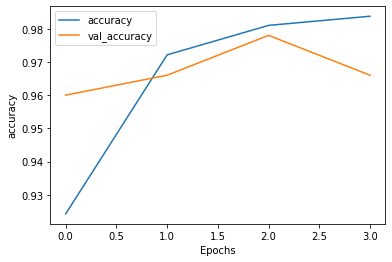

In [19]:
plot_graphs(history, 'accuracy')

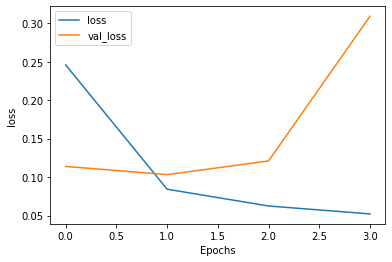

In [20]:
plot_graphs(history, 'loss')

In [21]:
# 加载模型并评估
tempModel = tf.keras.models.load_model('modelCNN')
test_loss, test_acc = tempModel.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

20/20 [==============================] - 0s 17ms/step - loss: 0.1296 - accuracy: 0.9650
Test Loss: 0.12963265907019378
Test Accuracy: 0.9649999737739563
